In [162]:
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf
import math
from statsmodels.tsa.stattools import adfuller
import pandas as pd



In [163]:
sol_df = pd.read_csv("Data/SOL_USDC_USDC_1m.csv")
aave_df = pd.read_csv("Data/AAVE_USDC_USDC_1m.csv")

base_close = sol_df['close']
quote_close = aave_df['close']

In [164]:
base_symbol = "SOL"
quote_symbol = "AAVE"


period = "1m"
interval = "3d"

base_close_series = base_close
quote_close_series = quote_close

shared_timestamps = base_close_series.index.intersection(quote_close_series.index)

base_price_aligned = base_close_series.loc[shared_timestamps]
quote_price_aligned = quote_close_series.loc[shared_timestamps]


first_axis = base_price_aligned.to_numpy()
second_axis = quote_price_aligned.to_numpy()


/var/folders/c_/_ctxnkln1z76h710t7sk2rk40000gn/T/ipykernel_93228/693241858.py:7: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


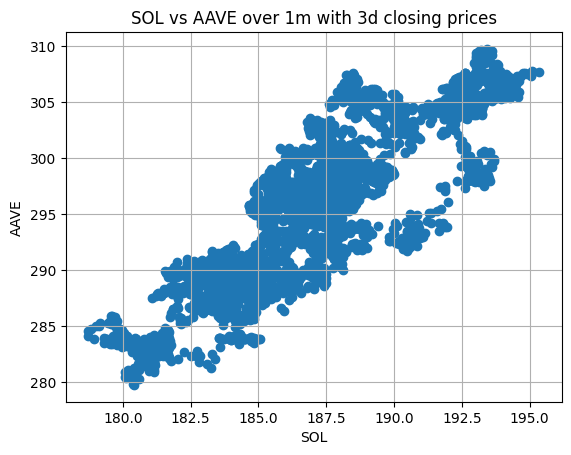

In [165]:
fig, ax = plt.subplots()
ax.scatter(first_axis,second_axis)
ax.set_xlabel(base_symbol)
ax.set_ylabel(quote_symbol)
ax.set_title(f"{base_symbol} vs {quote_symbol} over {period} with {interval} closing prices")
ax.grid(True)
fig.show()

<function matplotlib.pyplot.show(close=None, block=None)>

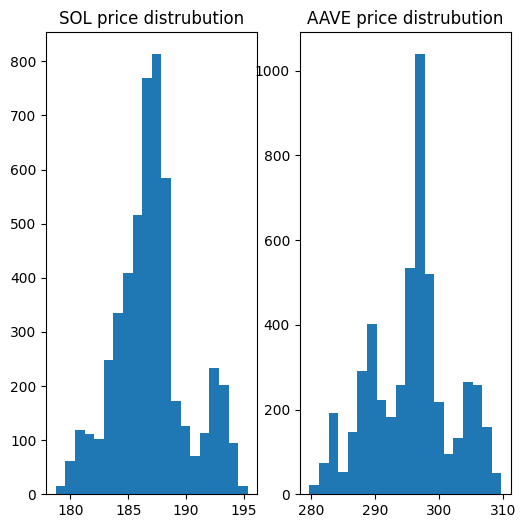

In [166]:
bins = 20

fig,(base_hist,quote_hist) = plt.subplots(nrows=1,ncols=2,figsize=(6,6))
base_hist.hist(first_axis,bins=bins)
base_hist.set_title(f"{base_symbol} price distrubution")

quote_hist.hist(second_axis,bins=bins)
quote_hist.set_title(f"{quote_symbol} price distrubution")

plt.show


In [167]:
price_matrix = np.matrix(
    [first_axis,second_axis]
    
    
    )
print(price_matrix.shape)



# print(matrix)

(2, 5113)


In [168]:
first_axis_mean = first_axis.mean()
second_axis_mean = second_axis.mean()

first_axis = [v-first_axis_mean for v in first_axis]
second_axis = [j-second_axis_mean for j in second_axis]

price_centered_matrix = np.matrix(
    [first_axis,second_axis]
)


  

print(price_centered_matrix.shape)

(2, 5113)


In [169]:
U,Singular_Vals,V_Trans = np.linalg.svd(price_centered_matrix,full_matrices=False)


print(U.shape)
print(V_Trans.shape)


principal_vector_one = V_Trans[0,:]
principal_vector_two = V_Trans[1,:]

print(principal_vector_one.shape)
print(principal_vector_two.shape)

(2, 2)
(2, 5113)
(1, 5113)
(1, 5113)


In [170]:
singular_vals_squared = [v**2 for v in Singular_Vals]

lambda_1 = singular_vals_squared[0] 
lambda_2 = singular_vals_squared[1] 

total_variance = lambda_1 + lambda_2
lambda_1_var = lambda_1/total_variance
lambda_2_var = lambda_2/total_variance

print(f"Total variance is {total_variance:.2f}")
print(f"lambda one explains {lambda_1_var * 100:.2f}%")
print(f"lambda two explains {lambda_2_var * 100:.2f}%")

Total variance is 251469.52
lambda one explains 95.86%
lambda two explains 4.14%


In [171]:
p_reduced = Singular_Vals[0] * principal_vector_one
p_reduced_1d = np.array(p_reduced).flatten()

  

In [172]:
result = adfuller(p_reduced_1d)

adf_stat = result[0]
p_value = result[1]

used_lags = result[2]
n_obs = result[3]

critical_values = result[4]

print(f"ADF Statistic: {adf_stat}")
print(f"p-value: {p_value}")
print(f"Used Lags: {used_lags}")
print(f"Number of Observations: {n_obs}")
print("Critical Values:")
for key, value in critical_values.items():
       print(f"    {key}: {value}")



ADF Statistic: -0.5383113947937415
p-value: 0.8843209916589254
Used Lags: 1
Number of Observations: 5111
Critical Values:
    1%: -3.4316300992622963
    5%: -2.862105668155371
    10%: -2.5670711053803372


Text(0.5, 1.0, 'Resisdual histogram')

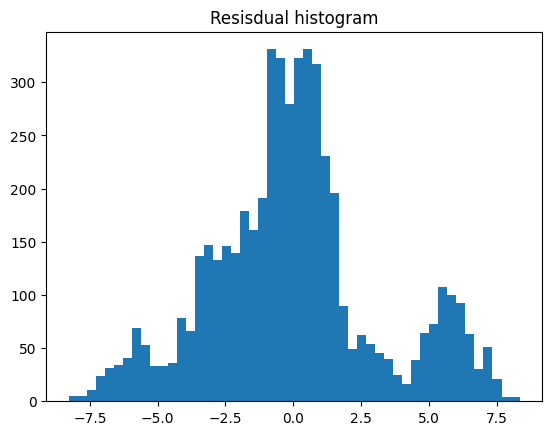

In [173]:
bins = 50

fig,(base_hist) = plt.subplots()
base_hist.hist(first_axis,bins=bins)
base_hist.set_title("Resisdual histogram")


